In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pylab
import scikitplot as skplt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2, chi2_contingency
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
os.chdir('E:\Edwisor\Project_2')          # Change this Working directory to the location where you have this data file and then run the code.

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [6]:
df.shape

(731, 16)

In [7]:
df = df.rename(columns = {'yr' : 'year', 'mnth' : 'month', 'weathersit' : 'weather', 'temp' : 'temperature', 
               'atemp' : 'feeling_temperature', 'hum' : 'humidity', 'cnt' : 'count'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   instant              731 non-null    int64  
 1   dteday               731 non-null    object 
 2   season               731 non-null    int64  
 3   year                 731 non-null    int64  
 4   month                731 non-null    int64  
 5   holiday              731 non-null    int64  
 6   weekday              731 non-null    int64  
 7   workingday           731 non-null    int64  
 8   weather              731 non-null    int64  
 9   temperature          731 non-null    float64
 10  feeling_temperature  731 non-null    float64
 11  humidity             731 non-null    float64
 12  windspeed            731 non-null    float64
 13  casual               731 non-null    int64  
 14  registered           731 non-null    int64  
 15  count                731 non-null    int

In [9]:
df.describe()

instant      season        year       month     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday     weather  temperature  feeling_temperature    humidity  \
count  731.000000  731.000000   731.000000           731.000000  731.000000   
mean     0.683995    1.395349     0.495385             0.474354    0.627894   
std      0.465233    0.544894     0.183051             0.162961    0.142429   
min      0.000000    1.000000     0.059130             0.079070    0.000000   
25%      0.000000    1.000000     0.337083             0.337842    0.520000   
50%      1.000000    1.000000     0.498333             0.486733    0.626667   
75%      1.000000    2.000000     0.655417             0.608602    0.730209   
max      1.000000    3.000000     0.861667             0.840896    0.972500   

        windspeed       casual   registered        count  
count  731.000000   731.000000   731.000000   731.000000  
mean     0.190486   848.176471  3656.172367  4504.348837  
std      0.077498   686.622488  1560.256377  1937.211452  
min      0.022392     2.000000    20.000000    22.000000  
25%      0.134950   315.500000  2497.000000  3152.000000  
50%      0.180975   713.000000  3662.000000  4548.000000  
75%      0.233214  1096.000000  4776.500000  5956.000000  
max      0.507463  3410.000000  6946.000000  8714.000000

In [10]:
# From the PDF file attached with this project, count = Casual + Registered. So we can drop these columns.
# The column instant is record index so we can remove this.
# The column dteday is date and we have all information extracted like season, year, month so we can drop this also.

df_1 = df.drop(['casual', 'registered', 'instant', 'dteday'], axis = 1)

In [11]:
df_1.head()

season  year  month  holiday  weekday  workingday  weather  temperature  \
0       1     0      1        0        6           0        2     0.344167   
1       1     0      1        0        0           0        2     0.363478   
2       1     0      1        0        1           1        1     0.196364   
3       1     0      1        0        2           1        1     0.200000   
4       1     0      1        0        3           1        1     0.226957   

   feeling_temperature  humidity  windspeed  count  
0             0.363625  0.805833   0.160446    985  
1             0.353739  0.696087   0.248539    801  
2             0.189405  0.437273   0.248309   1349  
3             0.212122  0.590435   0.160296   1562  
4             0.229270  0.436957   0.186900   1600

In [12]:
df_1.shape

(731, 12)

In [13]:
# continous features
cont_cols = ['temperature', 'feeling_temperature', 'humidity', 'windspeed']

#Categorical features
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

### EDA

In [14]:
#Missing Value Analysis
for col in df_1.columns:
    print('{} has {}% of Null Values i.e. has {} Null values'.format(col, (df_1[col].isnull().sum()*100/len(df)), df_1[col].isnull().sum()))

season has 0.0% of Null Values i.e. has 0 Null values
year has 0.0% of Null Values i.e. has 0 Null values
month has 0.0% of Null Values i.e. has 0 Null values
holiday has 0.0% of Null Values i.e. has 0 Null values
weekday has 0.0% of Null Values i.e. has 0 Null values
workingday has 0.0% of Null Values i.e. has 0 Null values
weather has 0.0% of Null Values i.e. has 0 Null values
temperature has 0.0% of Null Values i.e. has 0 Null values
feeling_temperature has 0.0% of Null Values i.e. has 0 Null values
humidity has 0.0% of Null Values i.e. has 0 Null values
windspeed has 0.0% of Null Values i.e. has 0 Null values
count has 0.0% of Null Values i.e. has 0 Null values


C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


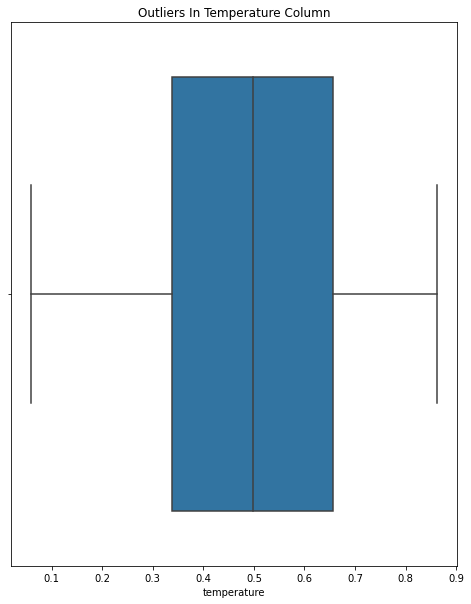

In [15]:
# Outlier Analysis
plt.figure(figsize = (8, 10))
sns.boxplot('temperature', data = df_1)
plt.title('Outliers In Temperature Column')      # Checking for outliers in Age Column
plt.savefig('Outliers In Temperature Columns.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


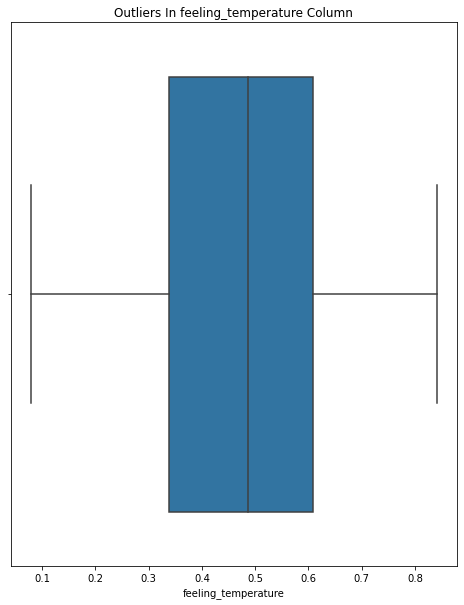

In [16]:
# Outlier Analysis
plt.figure(figsize = (8, 10))
sns.boxplot('feeling_temperature', data = df_1)
plt.title('Outliers In feeling_temperature Column')      # Checking for outliers in Age Column
plt.savefig('Outliers In feeling_temperature Columns.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


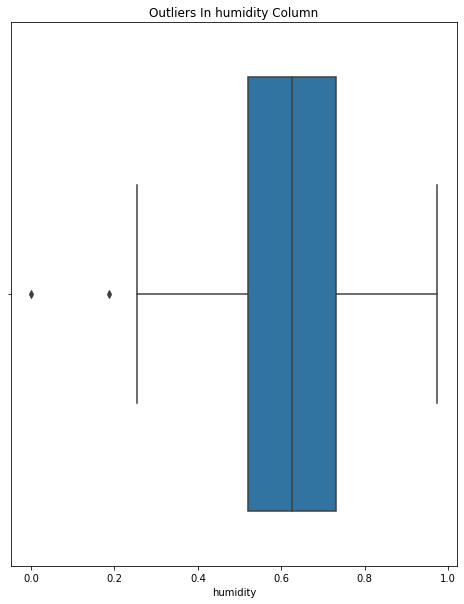

In [17]:
# Outlier Analysis
plt.figure(figsize = (8, 10))
sns.boxplot('humidity', data = df_1)
plt.title('Outliers In humidity Column')      # Checking for outliers in Age Column
plt.savefig('Outliers In humidity Columns.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


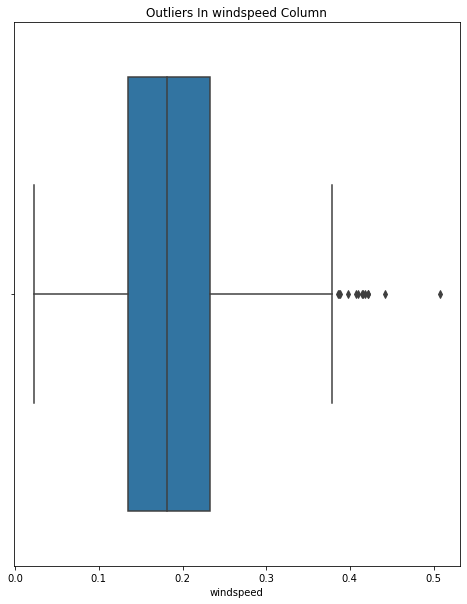

In [18]:
# Outlier Analysis
plt.figure(figsize = (8, 10))
sns.boxplot('windspeed', data = df_1)
plt.title('Outliers In windspeed Column')      # Checking for outliers in Age Column
plt.savefig('Outliers In windspeed Columns.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

In [19]:
# As only humidity and windspeed have outliers, and that too in small numbers, we can do the caping of values

for i in cont_cols:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(df_1[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    df_1.loc[df_1[i] < LL ,i] = LL 
   # For ioutliers
    df_1.loc[df_1[i] > UL ,i] = UL 
     

temperature
feeling_temperature
humidity
windspeed


C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


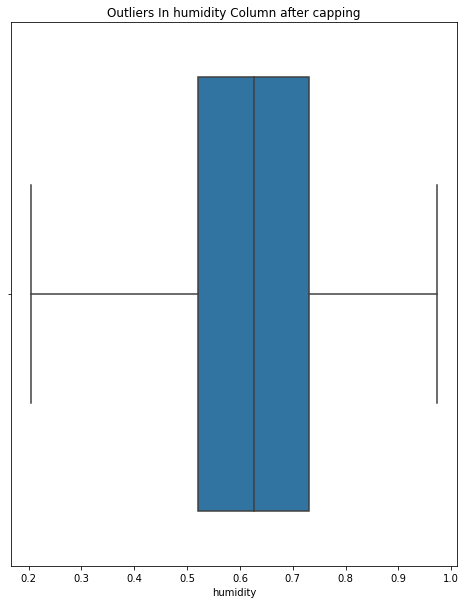

In [20]:
plt.figure(figsize = (8, 10))
sns.boxplot('humidity', data = df_1)
plt.title('Outliers In humidity Column after capping')      # Checking for outliers in Age Column
plt.savefig('Outliers In humidity Columns after capping.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


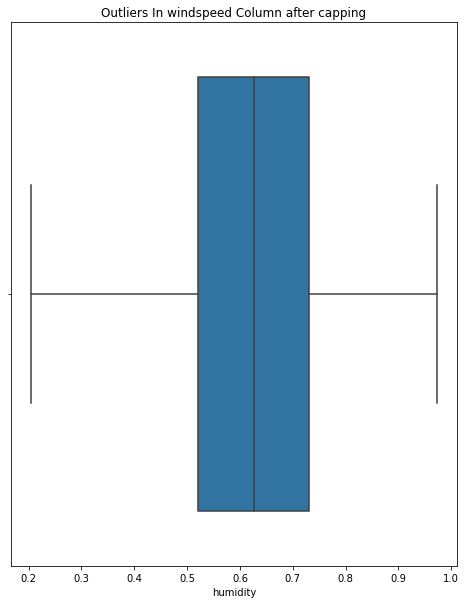

In [21]:
plt.figure(figsize = (8, 10))
sns.boxplot('humidity', data = df_1)
plt.title('Outliers In windspeed Column after capping')      # Checking for outliers in Age Column
plt.savefig('Outliers In windspeed Columns after capping.jpg', dpi = 500)        #Saving Figure in the working directory
plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


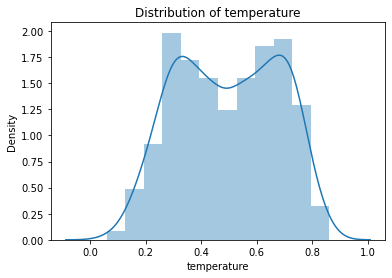

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


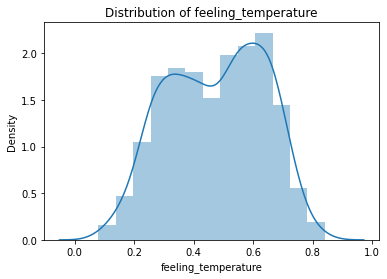

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


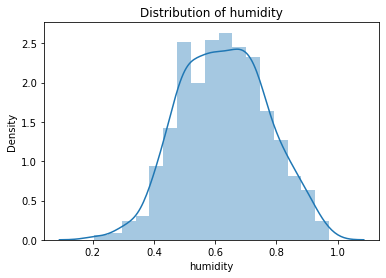

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


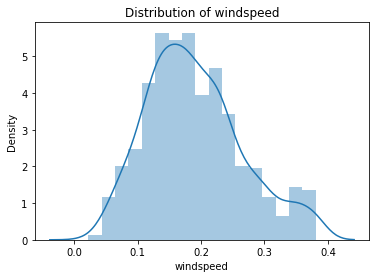

In [22]:
for col in cont_cols:
    sns.distplot(df_1[col])
    plt.title('Distribution of ' + col)
    plt.savefig('Distribution of ' + col, dpi = 500)
    plt.show()

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


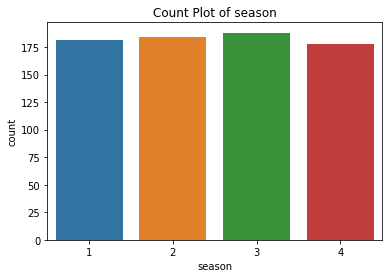

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


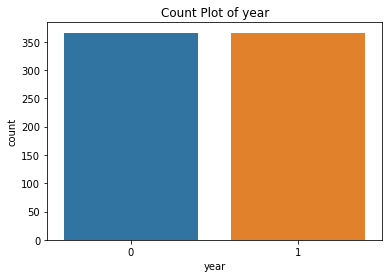

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


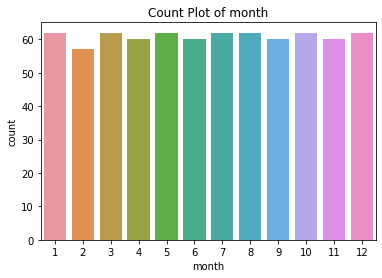

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


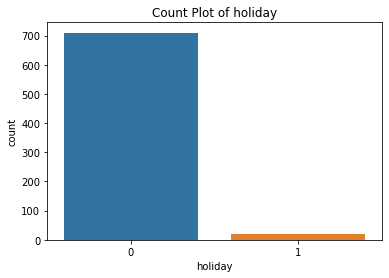

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


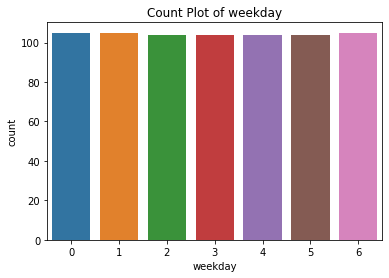

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


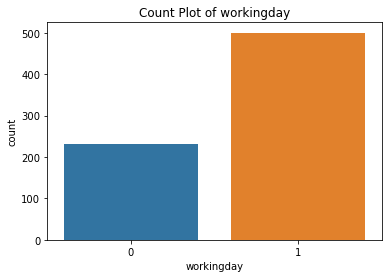

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


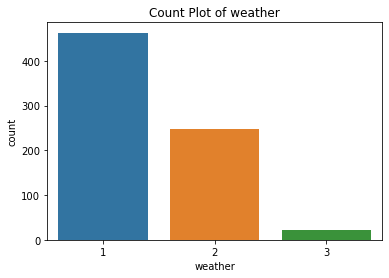

In [23]:
for col in cat_cols:
    sns.countplot(df_1[col])
    plt.title('Count Plot of ' + col)
    plt.savefig('Count Plot of ' + col, dpi = 500)
    plt.show()

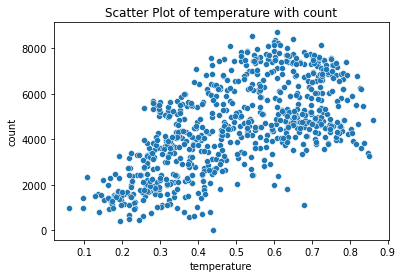

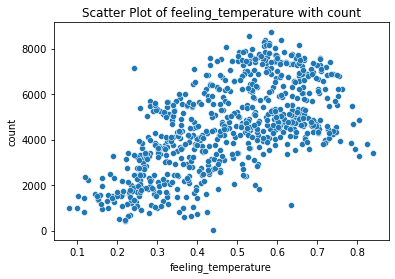

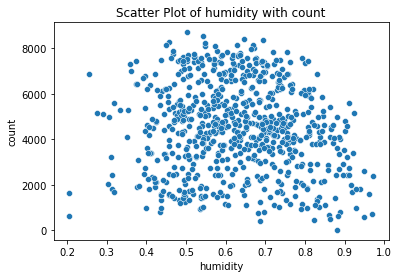

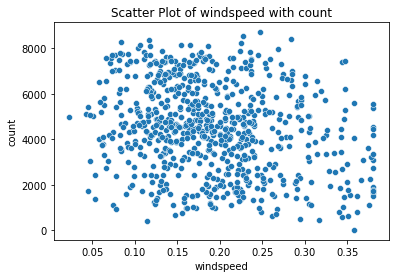

In [24]:
for col in cont_cols:
    sns.scatterplot(x = col, y = 'count', data = df_1)
    plt.title('Scatter Plot of ' + col + ' with count')
    plt.savefig('Scatter Plot of ' + col + ' with count', dpi = 500)
    plt.show()

In [25]:
# When Temperature is from 0.2 to 0.8, the count value is high and very scattered and appears to correlated
# When Feeling Temperature is from 0.2 to 0.7, the count value is high and very scattered and appears to correlated
# When Humidity is from 0.4 to 0.9, the count value is high and very scattered and did not appear correlated.
# When Windspeed is from 0.1 to 0.35, the count value is high and very scattered and did not appear correlated.

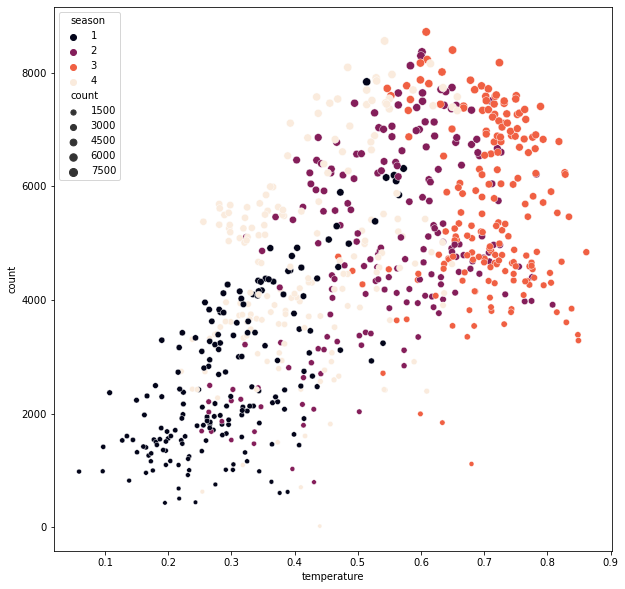

In [26]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'temperature', y = 'count', hue = 'season', size = 'count', data = df_1, palette="rocket")
plt.savefig('Scatter Plot of temperature with count w.r.t. Season.jpg', dpi = 500)
plt.show()

In [27]:
# Higher count values for season 1, 2, 3 is in temperature range of 0.35 to 0.8.
# For season 4 the count values are higher for temperature from 0.7 to 0.9.
# For season 1, less number of count is when temperature is low.

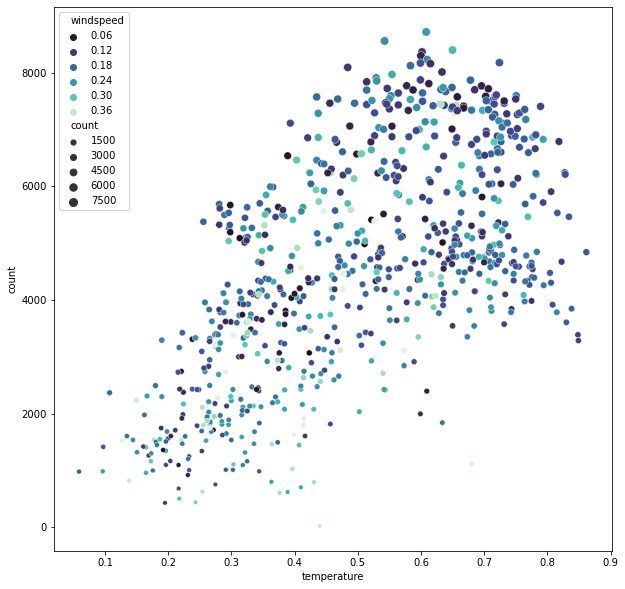

In [28]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'temperature', y = 'count', hue = 'windspeed', size = 'count', data = df_1, palette="mako")
plt.savefig('Scatter Plot of temperature with count w.r.t. windspeed.jpg', dpi = 500)
plt.show()

In [29]:
# From above graph, most values of count are from windspeed of 0.06 and 0.12.

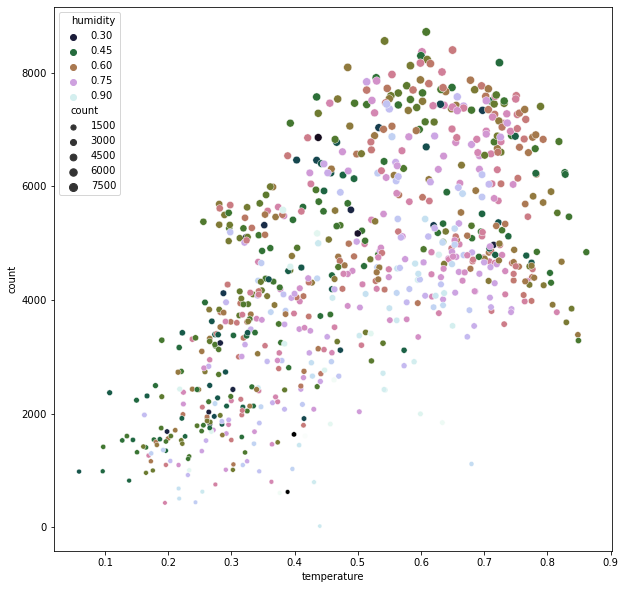

In [30]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'temperature', y = 'count', hue = 'humidity', size = 'count', data = df_1, palette="cubehelix")
plt.savefig('Scatter Plot of temperature with count w.r.t. humidity.jpg', dpi = 500)
plt.show()

In [31]:
# Higher bookings are when the temperature is from 0.5 to 0.8 and humidity equal to 0.75 and 0.9 

<Figure size 1080x1080 with 0 Axes>

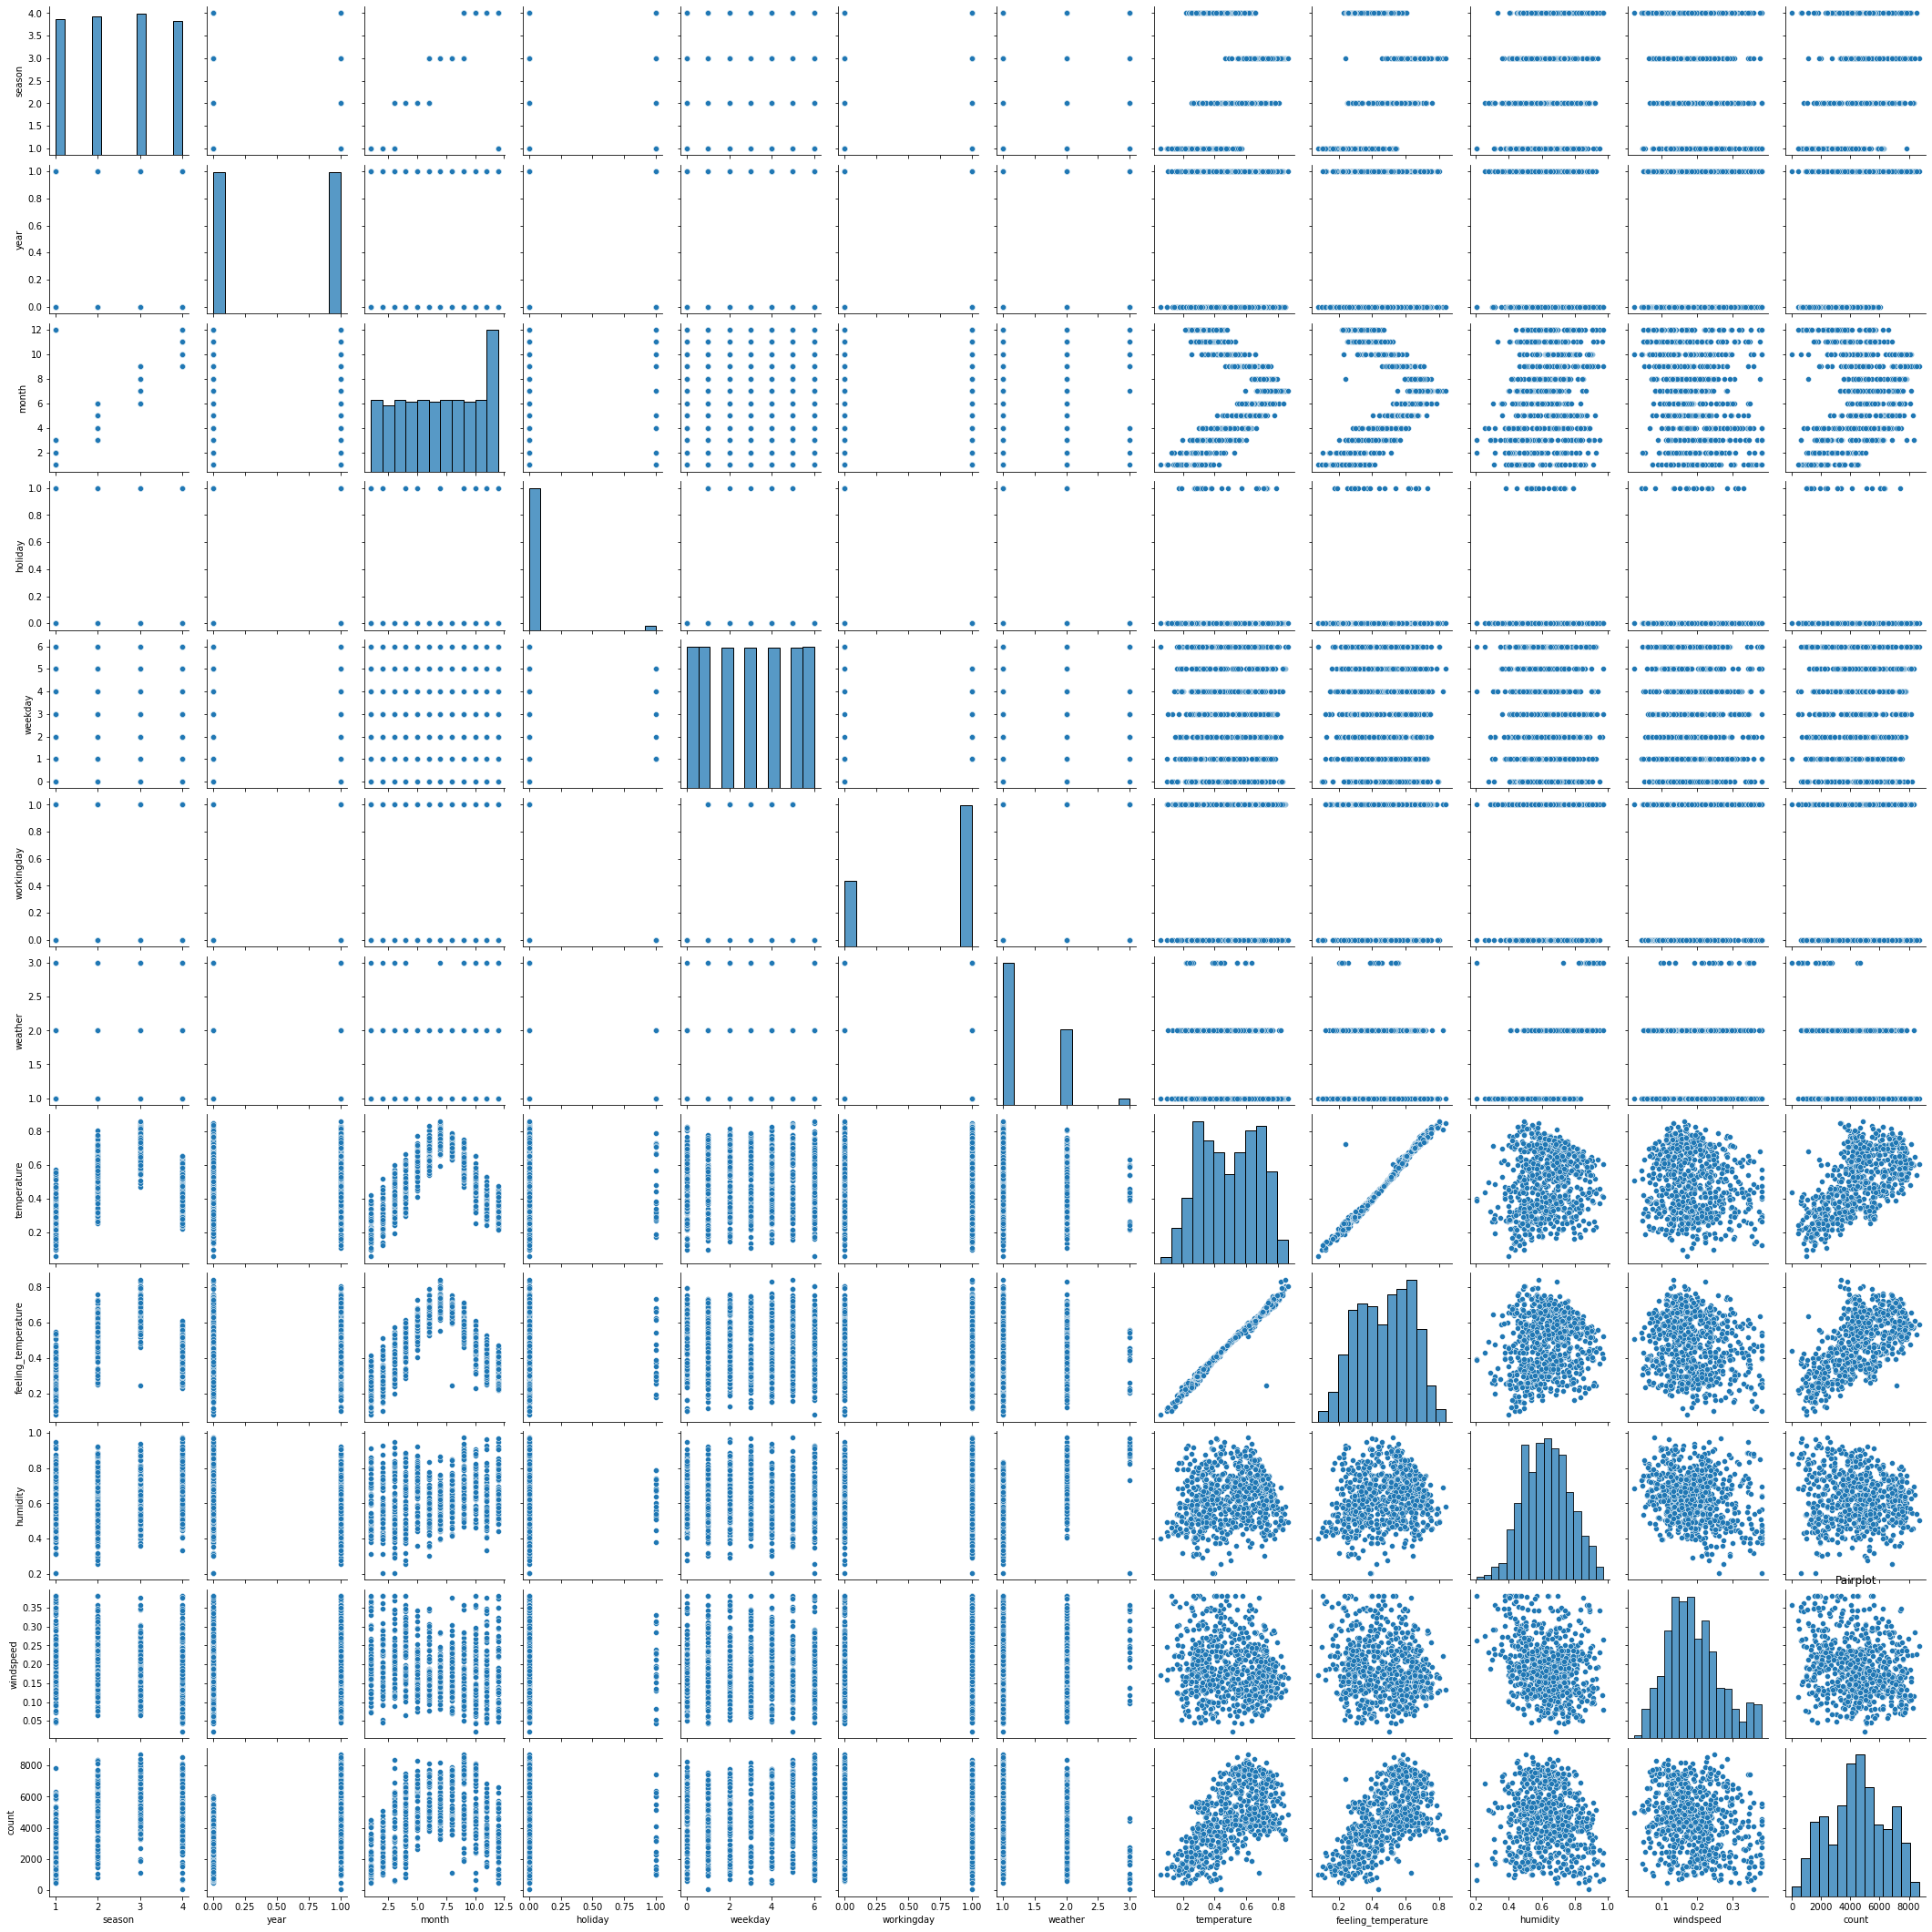

In [32]:
plt.figure(figsize = (15, 15))
sns.pairplot(df_1, palette='cubehelix')
plt.title('Pairplot')                                     # Value Counts of Default Column
plt.savefig('Pairplot.jpg', dpi = 500)                    #Saving Figure in the working directory
plt.show()

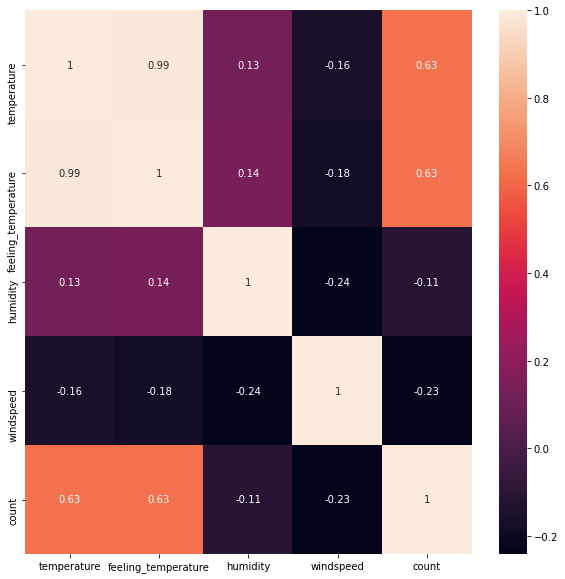

In [33]:
plt.figure(figsize = (10, 10))
corr_feat = ['temperature', 'feeling_temperature', 'humidity', 'windspeed', 'count']
df_corr = df_1.loc[:,corr_feat]
correlation = df_corr.corr()
sns.heatmap(correlation, annot = True)
plt.savefig('Correlation.jpg', dpi = 500)
plt.show()

In [34]:
# Temperature and feeling temperature are highly correlated and both jave a correlation of 0.63 with the traget variable.
#So we can drop either of them. 

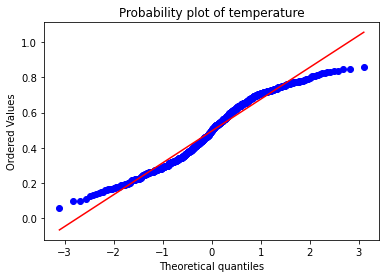

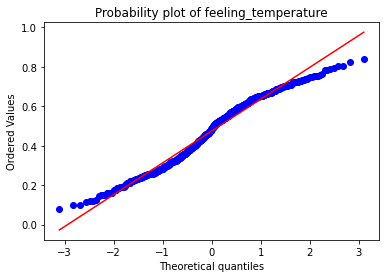

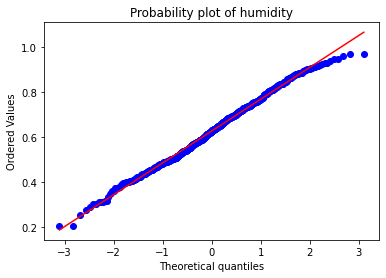

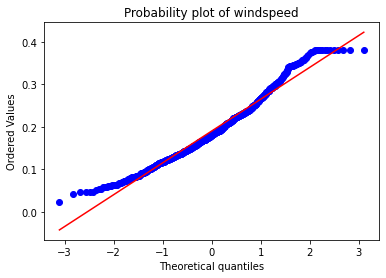

In [35]:
for col in cont_cols:
    stats.probplot(df_1[col], dist = 'norm', plot= pylab)
    plt.title('Probability plot of ' + col)
    plt.show()

In [36]:
# All the continous features are very close to normal distribution.

In [37]:
# Lets find significant categorical variables usig ANOVA test 

# Anova analysis for categorical variable with target numeric variable

for i in cat_cols:
    model = ols('count' + '~' + i, data = df_1).fit()
    anova_table = sm.stats.anova_lm(model, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

In [38]:
# From the anova result, we can observe working day,weekday and holiday 
# has p value > 0.05, so delete this variable not consider in model.
#Removing 'feeling temperature', 'holiday','weekday','workingday'
df_1 = df_1.drop(['feeling_temperature', 'holiday','weekday','workingday'], axis=1)

In [39]:
df_1.shape

(731, 8)

In [40]:
df_1.describe()

season        year       month     weather  temperature  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     2.496580    0.500684    6.519836    1.395349     0.495385   
std      1.110807    0.500342    3.451913    0.544894     0.183051   
min      1.000000    0.000000    1.000000    1.000000     0.059130   
25%      2.000000    0.000000    4.000000    1.000000     0.337083   
50%      3.000000    1.000000    7.000000    1.000000     0.498333   
75%      3.000000    1.000000   10.000000    2.000000     0.655417   
max      4.000000    1.000000   12.000000    3.000000     0.861667   

         humidity   windspeed        count  
count  731.000000  731.000000   731.000000  
mean     0.628197    0.189846  4504.348837  
std      0.141320    0.075644  1937.211452  
min      0.204687    0.022392    22.000000  
25%      0.520000    0.134950  3152.000000  
50%      0.626667    0.180975  4548.000000  
75%      0.730209    0.233214  5956.000000  
max      0.972500    0.380611  8714.000000

In [41]:
# As the values of all variables are of same range, so we don't need to do any feature scaling

In [42]:
# Creating dummy variables for categorical columns
cat_cols = ['season', 'year', 'month', 'weather']

df_1_cat = df_1['count']
for i in cat_cols:
    temporary = pd.get_dummies(df_1[i], prefix= i, drop_first= True)
    df_1_cat = pd.merge(df_1_cat, temporary, right_index= True, left_index= True)
df_1_cat

count  season_2  season_3  season_4  year_1  month_2  month_3  month_4  \
0      985         0         0         0       0        0        0        0   
1      801         0         0         0       0        0        0        0   
2     1349         0         0         0       0        0        0        0   
3     1562         0         0         0       0        0        0        0   
4     1600         0         0         0       0        0        0        0   
..     ...       ...       ...       ...     ...      ...      ...      ...   
726   2114         0         0         0       1        0        0        0   
727   3095         0         0         0       1        0        0        0   
728   1341         0         0         0       1        0        0        0   
729   1796         0         0         0       1        0        0        0   
730   2729         0         0         0       1        0        0        0   

     month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0          0        0        0        0        0         0         0   
1          0        0        0        0        0         0         0   
2          0        0        0        0        0         0         0   
3          0        0        0        0        0         0         0   
4          0        0        0        0        0         0         0   
..       ...      ...      ...      ...      ...       ...       ...   
726        0        0        0        0        0         0         0   
727        0        0        0        0        0         0         0   
728        0        0        0        0        0         0         0   
729        0        0        0        0        0         0         0   
730        0        0        0        0        0         0         0   

     month_12  weather_2  weather_3  
0           0          1          0  
1           0          1          0  
2           0          0          0  
3           0          0          0  
4           0          0          0  
..        ...        ...        ...  
726         1          1          0  
727         1          1          0  
728         1          1          0  
729         1          0          0  
730         1          1          0  

[731 rows x 18 columns]

In [43]:
cont_cols = ['temperature', 'humidity', 'windspeed']
df_1_num = df_1[cont_cols]
df_1_num

temperature  humidity  windspeed
0       0.344167  0.805833   0.160446
1       0.363478  0.696087   0.248539
2       0.196364  0.437273   0.248309
3       0.200000  0.590435   0.160296
4       0.226957  0.436957   0.186900
..           ...       ...        ...
726     0.254167  0.652917   0.350133
727     0.253333  0.590000   0.155471
728     0.253333  0.752917   0.124383
729     0.255833  0.483333   0.350754
730     0.215833  0.577500   0.154846

[731 rows x 3 columns]

In [44]:
df_final  =pd.merge(df_1_num, df_1_cat, right_index = True, left_index = True)
df_final

temperature  humidity  windspeed  count  season_2  season_3  season_4  \
0       0.344167  0.805833   0.160446    985         0         0         0   
1       0.363478  0.696087   0.248539    801         0         0         0   
2       0.196364  0.437273   0.248309   1349         0         0         0   
3       0.200000  0.590435   0.160296   1562         0         0         0   
4       0.226957  0.436957   0.186900   1600         0         0         0   
..           ...       ...        ...    ...       ...       ...       ...   
726     0.254167  0.652917   0.350133   2114         0         0         0   
727     0.253333  0.590000   0.155471   3095         0         0         0   
728     0.253333  0.752917   0.124383   1341         0         0         0   
729     0.255833  0.483333   0.350754   1796         0         0         0   
730     0.215833  0.577500   0.154846   2729         0         0         0   

     year_1  month_2  month_3  ...  month_5  month_6  month_7  month_8  \
0         0        0        0  ...        0        0        0        0   
1         0        0        0  ...        0        0        0        0   
2         0        0        0  ...        0        0        0        0   
3         0        0        0  ...        0        0        0        0   
4         0        0        0  ...        0        0        0        0   
..      ...      ...      ...  ...      ...      ...      ...      ...   
726       1        0        0  ...        0        0        0        0   
727       1        0        0  ...        0        0        0        0   
728       1        0        0  ...        0        0        0        0   
729       1        0        0  ...        0        0        0        0   
730       1        0        0  ...        0        0        0        0   

     month_9  month_10  month_11  month_12  weather_2  weather_3  
0          0         0         0         0          1          0  
1          0         0         0         0          1          0  
2          0         0         0         0          0          0  
3          0         0         0         0          0          0  
4          0         0         0         0          0          0  
..       ...       ...       ...       ...        ...        ...  
726        0         0         0         1          1          0  
727        0         0         0         1          1          0  
728        0         0         0         1          1          0  
729        0         0         0         1          0          0  
730        0         0         0         1          1          0  

[731 rows x 21 columns]

In [45]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [46]:
X = df_final.drop(['count'], axis = 1)
y = df_final['count']

In [47]:
X.shape, y.shape

((731, 20), (731,))

In [48]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 20), (147, 20), (584,), (147,))

### Linear Regression

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
# Model prediction on  on train data
y_pred_train_lr= lr.predict(X_train)

# Model prediction on test data
y_pred_test_lr= lr.predict(X_test)

# Model performance on train data
MAPE_train_lr= MAPE(y_train,y_pred_train_lr)

# Model performance on test data
MAPE_test_lr= MAPE(y_test,y_pred_test_lr)

# r2 value for train data
r2_train_lr= r2_score(y_train,y_pred_train_lr)

# r2 value for test data-
r2_test_lr=r2_score(y_test,y_pred_test_lr)

# RMSE value for train data
RMSE_train_lr = np.sqrt(mean_squared_error(y_train,y_pred_train_lr))

# RMSE value for test data
RMSE_test_lr = np.sqrt(mean_squared_error(y_test,y_pred_test_lr))

print("Mean Absolute Precentage Error for train data on Linear Regression without hyperparameter tuning="+str(MAPE_train_lr))
print("Mean Absolute Precentage Error for test data on Linear Regression without hyperparameter tuning="+str(MAPE_test_lr))
print("R^2_score for train data on Linear Regression without hyperparameter tuning="+str(r2_train_lr))
print("R^2_score for test data on Linear Regression without hyperparameter tuning="+str(r2_test_lr))
print("RMSE for train data on Linear Regression without hyperparameter tuning="+str (RMSE_train_lr))
print("RMSE for test data on Linear Regression without hyperparameter tuning="+str(RMSE_test_lr))

Mean Absolute Precentage Error for train data on Linear Regression without hyperparameter tuning=43.77371916032878
Mean Absolute Precentage Error for test data on Linear Regression without hyperparameter tuning=19.685303059218434
R^2_score for train data on Linear Regression without hyperparameter tuning=0.8373616227857162
R^2_score for test data on Linear Regression without hyperparameter tuning=0.8392613195741988
RMSE for train data on Linear Regression without hyperparameter tuning=767.3019650844328
RMSE for test data on Linear Regression without hyperparameter tuning=826.8280143941638


In [52]:
Linear_Regression = [MAPE_train_lr, MAPE_test_lr, r2_train_lr, r2_test_lr, RMSE_train_lr, RMSE_test_lr]

### Linear Regression with Hyperparameter Tuning

In [53]:
lr_params = {'fit_intercept' : [True, False],
            'normalize' : [True, False]}

In [54]:
lr_gscv = GridSearchCV(estimator = lr, param_grid = lr_params, cv = 10, verbose= 2, scoring = 'r2')
lr_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END ................fit_intercept=True, normalize=False; total time=   0.0s
[CV] END ................fit_intercept=True, nor

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2', verbose=2)

In [55]:
# Model prediction on  on train data
y_pred_train_lr_gscv = lr_gscv.predict(X_train)

# Model prediction on test data
y_pred_test_lr_gscv = lr_gscv.predict(X_test)

# Model performance on train data
MAPE_train_lr_gscv = MAPE(y_train,y_pred_train_lr_gscv)

# Model performance on test data
MAPE_test_lr_gscv = MAPE(y_test,y_pred_test_lr_gscv)

# r2 value for train data
r2_train_lr_gscv = r2_score(y_train,y_pred_train_lr_gscv)

# r2 value for test data-
r2_test_lr_gscv = r2_score(y_test,y_pred_test_lr_gscv)

# RMSE value for train data
RMSE_train_lr_gscv = np.sqrt(mean_squared_error(y_train,y_pred_train_lr_gscv))

# RMSE value for test data
RMSE_test_lr_gscv = np.sqrt(mean_squared_error(y_test,y_pred_test_lr_gscv))

print("Mean Absolute Precentage Error for train data on Linear Regression with hyperparameter tuning="+str(MAPE_train_lr_gscv))
print("Mean Absolute Precentage Error for test data on Linear Regression with hyperparameter tuning="+str(MAPE_test_lr_gscv))
print("R^2_score for train data on Linear Regression with hyperparameter tuning="+str(r2_train_lr_gscv))
print("R^2_score for test data on Linear Regression with hyperparameter tuning="+str(r2_test_lr_gscv))
print("RMSE for train data on Linear Regression with hyperparameter tuning="+str (RMSE_train_lr_gscv))
print("RMSE for test data on Linear Regression with hyperparameter tuning="+str(RMSE_test_lr_gscv))

Mean Absolute Precentage Error for train data on Linear Regression with hyperparameter tuning=43.77371916032881
Mean Absolute Precentage Error for test data on Linear Regression with hyperparameter tuning=19.68530305921844
R^2_score for train data on Linear Regression with hyperparameter tuning=0.8373616227857162
R^2_score for test data on Linear Regression with hyperparameter tuning=0.8392613195741989
RMSE for train data on Linear Regression with hyperparameter tuning=767.3019650844327
RMSE for test data on Linear Regression with hyperparameter tuning=826.8280143941637


In [56]:
Linear_Regression_With_hyperparameter_tuning = [MAPE_train_lr_gscv, MAPE_test_lr_gscv, r2_train_lr_gscv, r2_test_lr_gscv, 
                                                RMSE_train_lr_gscv, RMSE_test_lr_gscv]

### Decision Tree

In [57]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
# Model prediction on  on train data
y_pred_train_dt = dt.predict(X_train)

# Model prediction on test data
y_pred_test_dt = dt.predict(X_test)

# Model performance on train data
MAPE_train_dt = MAPE(y_train,y_pred_train_dt)

# Model performance on test data
MAPE_test_dt = MAPE(y_test,y_pred_test_dt)

# r2 value for train data
r2_train_dt = r2_score(y_train,y_pred_train_dt)

# r2 value for test data-
r2_test_dt = r2_score(y_test,y_pred_test_dt)

# RMSE value for train data
RMSE_train_dt = np.sqrt(mean_squared_error(y_train,y_pred_train_dt))

# RMSE value for test data
RMSE_test_dt = np.sqrt(mean_squared_error(y_test,y_pred_test_dt))

print("Mean Absolute Precentage Error for train data on Decision Tree without hyperparameter tuning="+str(MAPE_train_dt))
print("Mean Absolute Precentage Error for test data on Decision Tree without hyperparameter tuning="+str(MAPE_test_dt))
print("R^2_score for train data on Decision Tree without hyperparameter tuning="+str(r2_train_dt))
print("R^2_score for test data on Decision Tree without hyperparameter tuning="+str(r2_test_dt))
print("RMSE for train data on Decision Tree without hyperparameter tuning="+str (RMSE_train_dt))
print("RMSE for test data on Decision Tree without hyperparameter tuning="+str(RMSE_test_dt))

Mean Absolute Precentage Error for train data on Decision Tree without hyperparameter tuning=0.0
Mean Absolute Precentage Error for test data on Decision Tree without hyperparameter tuning=25.056068493160527
R^2_score for train data on Decision Tree without hyperparameter tuning=1.0
R^2_score for test data on Decision Tree without hyperparameter tuning=0.7816451843135916
RMSE for train data on Decision Tree without hyperparameter tuning=0.0
RMSE for test data on Decision Tree without hyperparameter tuning=963.6878216969823


In [59]:
Decision_Tree = [MAPE_train_dt, MAPE_test_dt, r2_train_dt, r2_test_dt, RMSE_train_dt, RMSE_test_dt]

### Decision Tree with Hyperarameter Tuning

In [60]:
dt_params = {'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
            "splitter" : ['best', 'random'],
            'max_depth' : [5, 10, 15, 20, 30, None],
            'max_features' : ['auto', 'sqrt', 'log2', None],
            'ccp_alpha' : [0.0, 0.001, 0.01, 0.1, 1],
            "min_samples_leaf": [1, 2, 3, 4, 9]}

In [61]:
dt_gscv = GridSearchCV(estimator= dt, param_grid= dt_params, cv = 10, verbose= 2, scoring = 'r2')
dt_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 4800 candidates, totalling 48000 fits
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=mse, max_depth=5, max_fe

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1],
                         'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [5, 10, 15, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 9],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=2)

In [62]:
# Model prediction on  on train data
y_pred_train_dt_gscv = dt_gscv.predict(X_train)

# Model prediction on test data
y_pred_test_dt_gscv = dt_gscv.predict(X_test)

# Model performance on train data
MAPE_train_dt_gscv = MAPE(y_train,y_pred_train_dt_gscv)

# Model performance on test data
MAPE_test_dt_gscv = MAPE(y_test,y_pred_test_dt_gscv)

# r2 value for train data
r2_train_dt_gscv = r2_score(y_train,y_pred_train_dt_gscv)

# r2 value for test data-
r2_test_dt_gscv = r2_score(y_test,y_pred_test_dt_gscv)

# RMSE value for train data
RMSE_train_dt_gscv = np.sqrt(mean_squared_error(y_train,y_pred_train_dt_gscv))

# RMSE value for test data
RMSE_test_dt_gscv = np.sqrt(mean_squared_error(y_test,y_pred_test_dt_gscv))

print("Mean Absolute Precentage Error for train data on Decision Tree with hyperparameter tuning="+str(MAPE_train_dt_gscv))
print("Mean Absolute Precentage Error for test data on Decision Tree with hyperparameter tuning="+str(MAPE_test_dt_gscv))
print("R^2_score for train data on Decision Tree with hyperparameter tuning="+str(r2_train_dt_gscv))
print("R^2_score for test data on Decision Tree with hyperparameter tuning="+str(r2_test_dt_gscv))
print("RMSE for train data on Decision Tree with hyperparameter tuning="+str (RMSE_train_dt_gscv))
print("RMSE for test data on Decision Tree with hyperparameter tuning="+str(RMSE_test_dt_gscv))

Mean Absolute Precentage Error for train data on Decision Tree with hyperparameter tuning=28.078877659051876
Mean Absolute Precentage Error for test data on Decision Tree with hyperparameter tuning=25.2361690166668
R^2_score for train data on Decision Tree with hyperparameter tuning=0.8976316264637988
R^2_score for test data on Decision Tree with hyperparameter tuning=0.7859332221608389
RMSE for train data on Decision Tree with hyperparameter tuning=608.7482081060182
RMSE for test data on Decision Tree with hyperparameter tuning=954.1784845000533


In [63]:
Decision_Tree_with_hyperparameter_tuning = [MAPE_train_dt_gscv, MAPE_test_dt_gscv, r2_train_dt_gscv, r2_test_dt_gscv, 
                                                RMSE_train_dt_gscv, RMSE_test_dt_gscv]

### Random Forest

In [64]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [65]:
# Model prediction on  on train data
y_pred_train_rf = rf.predict(X_train)

# Model prediction on test data
y_pred_test_rf = rf.predict(X_test)

# Model performance on train data
MAPE_train_rf = MAPE(y_train,y_pred_train_rf)

# Model performance on test data
MAPE_test_rf = MAPE(y_test,y_pred_test_rf)

# r2 value for train data
r2_train_rf = r2_score(y_train,y_pred_train_rf)

# r2 value for test data-
r2_test_rf = r2_score(y_test,y_pred_test_rf)

# RMSE value for train data
RMSE_train_rf = np.sqrt(mean_squared_error(y_train,y_pred_train_rf))

# RMSE value for test data
RMSE_test_rf = np.sqrt(mean_squared_error(y_test,y_pred_test_rf))

print("Mean Absolute Precentage Error for train data on Random Forest without hyperparameter tuning="+str(MAPE_train_rf))
print("Mean Absolute Precentage Error for test data on Random Forest without hyperparameter tuning="+str(MAPE_test_rf))
print("R^2_score for train data on Random Forest without hyperparameter tuning="+str(r2_train_rf))
print("R^2_score for test data on Random Forest without hyperparameter tuning="+str(r2_test_rf))
print("RMSE for train data on Random Forest without hyperparameter tuning="+str (RMSE_train_rf))
print("RMSE for test data on Random Forest without hyperparameter tuning="+str(RMSE_test_rf))

Mean Absolute Precentage Error for train data on Random Forest without hyperparameter tuning=20.3654364310524
Mean Absolute Precentage Error for test data on Random Forest without hyperparameter tuning=21.602049118110177
R^2_score for train data on Random Forest without hyperparameter tuning=0.9791221023912513
R^2_score for test data on Random Forest without hyperparameter tuning=0.8750023226140513
RMSE for train data on Random Forest without hyperparameter tuning=274.9148350090405
RMSE for test data on Random Forest without hyperparameter tuning=729.1316580304115


In [66]:
Random_Forest = [MAPE_train_rf, MAPE_test_rf, r2_train_rf, r2_test_rf, 
                                                RMSE_train_rf, RMSE_test_rf]

### Random Forest with Hyperparameter Tuning

In [67]:
rf_params = {'n_estimators' : [100, 300, 500, 800],
             'max_depth' : [5, 8, 15, 25, 30]
             }


In [68]:
rf_gscv = GridSearchCV(estimator = rf, param_grid = rf_params, n_jobs = 5, cv = 5, verbose = 2, scoring = 'r2')

In [69]:
rf_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=5,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'n_estimators': [100, 300, 500, 800]},
             scoring='r2', verbose=2)

In [70]:
# Model prediction on  on train data
y_pred_train_rf_gscv = rf_gscv.predict(X_train)

# Model prediction on test data
y_pred_test_rf_gscv = rf_gscv.predict(X_test)

# Model performance on train data
MAPE_train_rf_gscv = MAPE(y_train,y_pred_train_rf_gscv)

# Model performance on test data
MAPE_test_rf_gscv = MAPE(y_test,y_pred_test_rf_gscv)

# r2 value for train data
r2_train_rf_gscv = r2_score(y_train,y_pred_train_rf_gscv)

# r2 value for test data-
r2_test_rf_gscv = r2_score(y_test,y_pred_test_rf_gscv)

# RMSE value for train data
RMSE_train_rf_gscv = np.sqrt(mean_squared_error(y_train,y_pred_train_rf_gscv))

# RMSE value for test data
RMSE_test_rf_gscv = np.sqrt(mean_squared_error(y_test,y_pred_test_rf_gscv))

print("Mean Absolute Precentage Error for train data on Random Forest with hyperparameter tuning="+str(MAPE_train_rf_gscv))
print("Mean Absolute Precentage Error for test data on Random Forest with hyperparameter tuning="+str(MAPE_test_rf_gscv))
print("R^2_score for train data on Random Forest with hyperparameter tuning="+str(r2_train_rf_gscv))
print("R^2_score for test data on Random Forest with hyperparameter tuning="+str(r2_test_rf_gscv))
print("RMSE for train data on Random Forest with hyperparameter tuning="+str (RMSE_train_rf_gscv))
print("RMSE for test data on Random Forest with hyperparameter tuning="+str(RMSE_test_rf_gscv))

Mean Absolute Precentage Error for train data on Random Forest with hyperparameter tuning=19.083585746729078
Mean Absolute Precentage Error for test data on Random Forest with hyperparameter tuning=21.252221476698686
R^2_score for train data on Random Forest with hyperparameter tuning=0.979788411333408
R^2_score for test data on Random Forest with hyperparameter tuning=0.8773195039142504
RMSE for train data on Random Forest with hyperparameter tuning=270.4923704715481
RMSE for test data on Random Forest with hyperparameter tuning=722.3417970189184


In [71]:
Random_Forest_with_hyperparameter_tuning = [MAPE_train_rf_gscv, MAPE_test_rf_gscv, r2_train_rf_gscv, r2_test_rf_gscv, 
                                                RMSE_train_rf_gscv, RMSE_test_rf_gscv]

### Gradient Boosting

In [72]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [73]:
# Model prediction on  on train data
y_pred_train_gb = gb.predict(X_train)

# Model prediction on test data
y_pred_test_gb = gb.predict(X_test)

# Model performance on train data
MAPE_train_gb = MAPE(y_train,y_pred_train_gb)

# Model performance on test data
MAPE_test_gb = MAPE(y_test,y_pred_test_gb)

# r2 value for train data
r2_train_gb = r2_score(y_train,y_pred_train_gb)

# r2 value for test data-
r2_test_gb = r2_score(y_test,y_pred_test_gb)

# RMSE value for train data
RMSE_train_gb = np.sqrt(mean_squared_error(y_train,y_pred_train_gb))

# RMSE value for test data
RMSE_test_gb = np.sqrt(mean_squared_error(y_test,y_pred_test_gb))

print("Mean Absolute Precentage Error for train data on Gradient Boosting without hyperparameter tuning="+str(MAPE_train_gb))
print("Mean Absolute Precentage Error for test data on Gradient Boosting without hyperparameter tuning="+str(MAPE_test_gb))
print("R^2_score for train data on Gradient Boosting without hyperparameter tuning="+str(r2_train_gb))
print("R^2_score for test data on Gradient Boosting without hyperparameter tuning="+str(r2_test_gb))
print("RMSE for train data on Gradient Boosting without hyperparameter tuning="+str (RMSE_train_gb))
print("RMSE for test data on Gradient Boosting without hyperparameter tuning="+str(RMSE_test_gb))

Mean Absolute Precentage Error for train data on Gradient Boosting without hyperparameter tuning=11.580784691892418
Mean Absolute Precentage Error for test data on Gradient Boosting without hyperparameter tuning=18.9736100259066
R^2_score for train data on Gradient Boosting without hyperparameter tuning=0.9458721066026087
R^2_score for test data on Gradient Boosting without hyperparameter tuning=0.8595735328860278
RMSE for train data on Gradient Boosting without hyperparameter tuning=442.6549823662904
RMSE for test data on Gradient Boosting without hyperparameter tuning=772.8219853728413


In [74]:
Gradient_Boosting = [MAPE_train_gb, MAPE_test_gb, r2_train_gb, r2_test_gb, 
                                                RMSE_train_gb, RMSE_test_gb]

### Gradient Boosting with Hyperparameter Tuning

In [75]:
gb_params = {
    'learning_rate' : [0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators' : [100, 300, 500, 800, 1200],
    'max_depth' : [8, 16, 24, 32]
}

In [76]:
gb_gscv = GridSearchCV(estimator= gb, param_grid= gb_params, n_jobs = 6, cv = 5, verbose = 2, scoring = 'r2')

In [77]:
gb_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
                         'max_depth': [8, 16, 24, 32],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             scoring='r2', verbose=2)

In [78]:
# Model prediction on  on train data
y_pred_train_gb_gscv = gb_gscv.predict(X_train)

# Model prediction on test data
y_pred_test_gb_gscv = gb_gscv.predict(X_test)

# Model performance on train data
MAPE_train_gb_gscv = MAPE(y_train,y_pred_train_gb_gscv)

# Model performance on test data
MAPE_test_gb_gscv = MAPE(y_test,y_pred_test_gb_gscv)

# r2 value for train data
r2_train_gb_gscv = r2_score(y_train,y_pred_train_gb_gscv)

# r2 value for test data-
r2_test_gb_gscv = r2_score(y_test,y_pred_test_gb_gscv)

# RMSE value for train data
RMSE_train_gb_gscv = np.sqrt(mean_squared_error(y_train,y_pred_train_gb_gscv))

# RMSE value for test data
RMSE_test_gb_gscv = np.sqrt(mean_squared_error(y_test,y_pred_test_gb_gscv))

print("Mean Absolute Precentage Error for train data on Gradient Boosting with hyperparameter tuning="+str(MAPE_train_gb_gscv))
print("Mean Absolute Precentage Error for test data on Gradient Boosting with hyperparameter tuning="+str(MAPE_test_gb_gscv))
print("R^2_score for train data on Gradient Boosting with hyperparameter tuning="+str(r2_train_gb_gscv))
print("R^2_score for test data on Gradient Boosting with hyperparameter tuning="+str(r2_test_gb_gscv))
print("RMSE for train data on Gradient Boosting with hyperparameter tuning="+str (RMSE_train_gb_gscv))
print("RMSE for test data on Gradient Boosting with hyperparameter tuning="+str(RMSE_test_gb_gscv))

Mean Absolute Precentage Error for train data on Gradient Boosting with hyperparameter tuning=0.43257693634069844
Mean Absolute Precentage Error for test data on Gradient Boosting with hyperparameter tuning=23.908832806824268
R^2_score for train data on Gradient Boosting with hyperparameter tuning=0.9998986790539256
R^2_score for test data on Gradient Boosting with hyperparameter tuning=0.8325577533394884
RMSE for train data on Gradient Boosting with hyperparameter tuning=19.151571334285705
RMSE for test data on Gradient Boosting with hyperparameter tuning=843.8932337810783


In [79]:
Gradient_Boosting_with_hyperparameter_tuning = [MAPE_train_gb_gscv, MAPE_test_gb_gscv, r2_train_gb_gscv, r2_test_gb_gscv, 
                                                RMSE_train_gb_gscv, RMSE_test_gb_gscv]

In [80]:
vals = [Linear_Regression, Linear_Regression_With_hyperparameter_tuning, Decision_Tree, Decision_Tree_with_hyperparameter_tuning,
       Random_Forest, Random_Forest_with_hyperparameter_tuning, Gradient_Boosting, Gradient_Boosting_with_hyperparameter_tuning]

In [81]:
df_result = pd.DataFrame(vals)
df_result

0          1         2         3           4           5
0  43.773719  19.685303  0.837362  0.839261  767.301965  826.828014
1  43.773719  19.685303  0.837362  0.839261  767.301965  826.828014
2   0.000000  25.056068  1.000000  0.781645    0.000000  963.687822
3  28.078878  25.236169  0.897632  0.785933  608.748208  954.178485
4  20.365436  21.602049  0.979122  0.875002  274.914835  729.131658
5  19.083586  21.252221  0.979788  0.877320  270.492370  722.341797
6  11.580785  18.973610  0.945872  0.859574  442.654982  772.821985
7   0.432577  23.908833  0.999899  0.832558   19.151571  843.893234

In [82]:
names = ['Linear_Regression', 'Linear_Regression_With_hyperparameter_tuning', 'Decision_Tree', 'Decision_Tree_with_hyperparameter_tuning',
       'Random_Forest', 'Random_Forest_with_hyperparameter_tuning', 'Gradient_Boosting', 'Gradient_Boosting_with_hyperparameter_tuning']
names = pd.DataFrame(names)
names

0
0                             Linear_Regression
1  Linear_Regression_With_hyperparameter_tuning
2                                 Decision_Tree
3      Decision_Tree_with_hyperparameter_tuning
4                                 Random_Forest
5      Random_Forest_with_hyperparameter_tuning
6                             Gradient_Boosting
7  Gradient_Boosting_with_hyperparameter_tuning

In [83]:
df_result = df_result.merge(names, right_index= True, left_index= True)
#df_result.columns = ['Precision', 'Recall', 'f_1_score', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'AUC_ROC-score']
df_result

0_x          1         2         3           4           5  \
0  43.773719  19.685303  0.837362  0.839261  767.301965  826.828014   
1  43.773719  19.685303  0.837362  0.839261  767.301965  826.828014   
2   0.000000  25.056068  1.000000  0.781645    0.000000  963.687822   
3  28.078878  25.236169  0.897632  0.785933  608.748208  954.178485   
4  20.365436  21.602049  0.979122  0.875002  274.914835  729.131658   
5  19.083586  21.252221  0.979788  0.877320  270.492370  722.341797   
6  11.580785  18.973610  0.945872  0.859574  442.654982  772.821985   
7   0.432577  23.908833  0.999899  0.832558   19.151571  843.893234   

                                            0_y  
0                             Linear_Regression  
1  Linear_Regression_With_hyperparameter_tuning  
2                                 Decision_Tree  
3      Decision_Tree_with_hyperparameter_tuning  
4                                 Random_Forest  
5      Random_Forest_with_hyperparameter_tuning  
6                             Gradient_Boosting  
7  Gradient_Boosting_with_hyperparameter_tuning

In [84]:
df_result.columns = ['MAPE_train', 'MAPE_test', 'r2_train', 'r2_test', 
                                                'RMSE_train', 'RMSE_test', 'Model']

In [85]:
df_result

MAPE_train  MAPE_test  r2_train   r2_test  RMSE_train   RMSE_test  \
0   43.773719  19.685303  0.837362  0.839261  767.301965  826.828014   
1   43.773719  19.685303  0.837362  0.839261  767.301965  826.828014   
2    0.000000  25.056068  1.000000  0.781645    0.000000  963.687822   
3   28.078878  25.236169  0.897632  0.785933  608.748208  954.178485   
4   20.365436  21.602049  0.979122  0.875002  274.914835  729.131658   
5   19.083586  21.252221  0.979788  0.877320  270.492370  722.341797   
6   11.580785  18.973610  0.945872  0.859574  442.654982  772.821985   
7    0.432577  23.908833  0.999899  0.832558   19.151571  843.893234   

                                          Model  
0                             Linear_Regression  
1  Linear_Regression_With_hyperparameter_tuning  
2                                 Decision_Tree  
3      Decision_Tree_with_hyperparameter_tuning  
4                                 Random_Forest  
5      Random_Forest_with_hyperparameter_tuning  
6                             Gradient_Boosting  
7  Gradient_Boosting_with_hyperparameter_tuning

In [86]:
filename = 'Project_2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_gscv, file)

In [108]:
# From above results Random Forest model have optimum values and this
# algorithm is good for our data 

# Lets save the out put of finalized model (RF)

input_val = X_test.reset_index(drop = True)
output = y_test.reset_index(drop = True)
pred = pd.DataFrame(y_pred_test_rf_gscv,columns = ['pred'])
final_1 = pred.merge(output, right_index = True, left_index = True)
Final_output = final_1.merge(input_val, right_index = True, left_index = True)

In [109]:
Final_output

pred  count  temperature  humidity  windspeed  season_2  season_3  \
0    5049.156667   5923     0.686667  0.585000   0.208342         0         1   
1    4624.710000   4592     0.750000  0.651250   0.159200         0         1   
2    1495.180000   1248     0.233333  0.498750   0.157963         0         0   
3     932.016667   1360     0.192174  0.829565   0.053213         0         0   
4    3681.840000   4075     0.341667  0.769583   0.073396         0         0   
..           ...    ...          ...       ...        ...       ...       ...   
142  5339.636667   5870     0.665833  0.844167   0.208967         0         1   
143  5242.770000   5499     0.380833  0.623333   0.235067         0         0   
144  4133.063333   5423     0.606667  0.862500   0.078383         0         0   
145  7407.216667   8294     0.600000  0.456250   0.083975         1         0   
146  4724.876667   4334     0.707059  0.561765   0.304659         0         1   

     season_4  year_1  month_2  ...  month_5  month_6  month_7  month_8  \
0           0       0        0  ...        0        0        1        0   
1           0       0        0  ...        0        0        1        0   
2           0       0        0  ...        0        0        0        0   
3           0       0        1  ...        0        0        0        0   
4           0       1        0  ...        0        0        0        0   
..        ...     ...      ...  ...      ...      ...      ...      ...   
142         0       1        0  ...        0        0        1        0   
143         1       1        0  ...        0        0        0        0   
144         1       0        0  ...        0        0        0        0   
145         0       1        0  ...        1        0        0        0   
146         0       0        0  ...        0        0        0        1   

     month_9  month_10  month_11  month_12  weather_2  weather_3  
0          0         0         0         0          0          0  
1          0         0         0         0          0          0  
2          0         0         0         0          1          0  
3          0         0         0         0          1          0  
4          0         0         0         0          1          0  
..       ...       ...       ...       ...        ...        ...  
142        0         0         0         0          1          0  
143        0         0         1         0          1          0  
144        1         0         0         0          1          0  
145        0         0         0         0          0          0  
146        0         0         0         0          0          0  

[147 rows x 22 columns]

In [107]:
Final_output.to_csv("rf_gscv_results_py.csv")